<a href="https://colab.research.google.com/github/VarunKoduru/Machine-Learning/blob/main/ML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#WEEK-1

In [ ]:
import numpy as np
n = np.arange(11)
n2 = n[n%2 != 0]
print(n2)

[1 3 5 7 9]


In [ ]:
n = np.arange(9).reshape(3,3)
normal = (n-np.mean(n))/np.std(n)
print(normal)

[[-1.54919334 -1.161895   -0.77459667]
 [-0.38729833  0.          0.38729833]
 [ 0.77459667  1.161895    1.54919334]]


In [ ]:
print(n)
print(np.trace(n))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
12


In [ ]:
a = np.array([1,2,0,0,4,0])
print(np.nonzero(a))

(array([0, 1, 4]),)


In [ ]:
n = np.eye(3,3)
print(n)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Date: 25th July 2025
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape
# print(X[:5])
col = iris.feature_names
print(iris.data.shape)
print(iris.keys())
print(iris.DESCR)
print(col)


(150, 4)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ====

In [ ]:
#WEEK-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset from scikit-learn
iris = load_iris()

# Convert to DataFrame and add Species column
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Add Id column (1-150)
df.insert(0, 'Id', range(1, len(df) + 1))

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Keys:", iris.keys())
print("Number of rows & columns:", iris.data.shape)
print("Feature Names:", iris.feature_names)
print("Description:\n", iris.DESCR[:500])

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Number of rows & columns: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====


In [ ]:
print("Number of observations:", len(df))
print("Missing values per column:\n", df.isnull().sum())#3)

Number of observations: 150
Missing values per column:
 Id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [ ]:
print(df.describe())

               Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
count  150.000000         150.000000        150.000000         150.000000   
mean    75.500000           5.843333          3.057333           3.758000   
std     43.445368           0.828066          0.435866           1.765298   
min      1.000000           4.300000          2.000000           1.000000   
25%     38.250000           5.100000          2.800000           1.600000   
50%     75.500000           5.800000          3.000000           4.350000   
75%    112.750000           6.400000          3.300000           5.100000   
max    150.000000           7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
for species in df['Species'].unique():
    print(f"\nObservations for {species}:")
    print(df[df['Species'] == species].head(3))


Observations for setosa:
   Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   

   petal width (cm) Species  
0               0.2  setosa  
1               0.2  setosa  
2               0.2  setosa  

Observations for versicolor:
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
50  51                7.0               3.2                4.7   
51  52                6.4               3.2                4.5   
52  53                6.9               3.1                4.9   

    petal width (cm)     Species  
50               1.4  versicolor  
51               1.5  versicolor  
52               1.5  versicolor  

Observations for virginica:
      Id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
100  101                6.3               3.3                

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


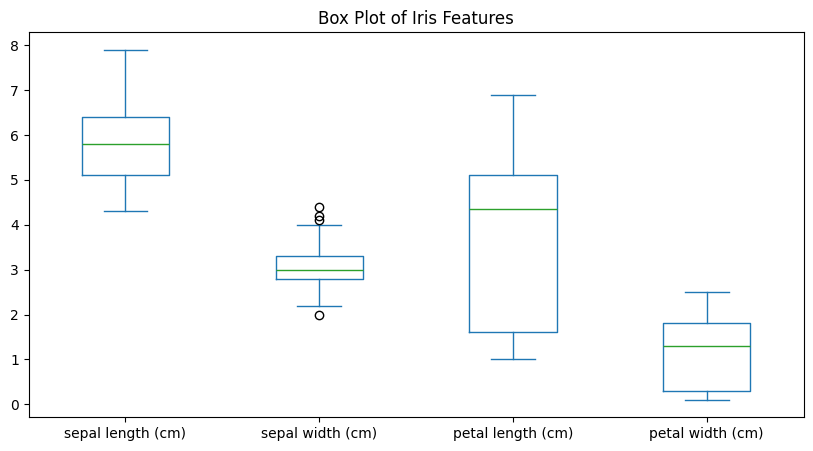

In [ ]:
df_no_id = df.drop(columns='Id')
print(df_no_id.head())
df_no_id.drop(columns='Species').plot(kind='box', figsize=(10,5))
plt.title("Box Plot of Iris Features")
plt.show()

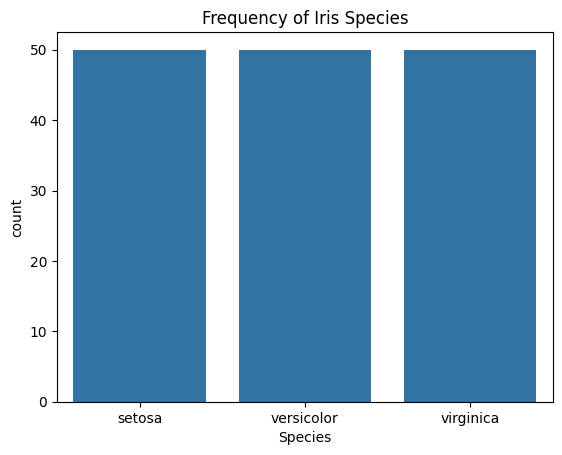

In [ ]:
sns.countplot(x='Species', data=df)
plt.title("Frequency of Iris Species")
plt.show()

In [ ]:
X = df.iloc[:, 0:4]
y = df['Species']
print("Attributes (X):\n", X.head())
print("\nLabels (y):\n", y.head())

Attributes (X):
    Id  sepal length (cm)  sepal width (cm)  petal length (cm)
0   1                5.1               3.5                1.4
1   2                4.9               3.0                1.4
2   3                4.7               3.2                1.3
3   4                4.6               3.1                1.5
4   5                5.0               3.6                1.4

Labels (y):
 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())


X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

=== Training Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
81    82                5.5               2.4                3.7
133  134                6.3               2.8                5.1
137  138                6.4               3.1                5.5
75    76                6.6               3.0                4.4
109  110                7.2               3.6                6.1

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8               2.8                4.8


In [ ]:
df['Species_Code'] = df['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
print(df[['Species', 'Species_Code']].head())
X = df.iloc[:, 0:4]
y = df['Species_Code']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("\n=== Training Data (first 5) ===\n", X_train.head())
print("\n=== Test Data (first 5) ===\n", X_test.head())

  Species Species_Code
0  setosa            0
1  setosa            0
2  setosa            0
3  setosa            0
4  setosa            0
Train shape: (120, 4) (120,)
Test shape: (30, 4) (30,)

=== Training Data (first 5) ===
     Id  sepal length (cm)  sepal width (cm)  petal length (cm)
22  23                4.6               3.6                1.0
15  16                5.7               4.4                1.5
65  66                6.7               3.1                4.4
11  12                4.8               3.4                1.6
42  43                4.4               3.2                1.3

=== Test Data (first 5) ===
       Id  sepal length (cm)  sepal width (cm)  petal length (cm)
73    74                6.1               2.8                4.7
18    19                5.7               3.8                1.7
118  119                7.7               2.6                6.9
78    79                6.0               2.9                4.5
76    77                6.8             

In [ ]:
#Week 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diab = pd.read_csv('/content/diabetes.csv')
#print(diab)

X = diab.drop(columns='Outcome')
y = diab["Outcome"]
print(X)
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(diab.drop(columns="Outcome"),diab["Outcome"],test_size=0.4,random_state=69)
constant_features = [features for features in X_train.columns if X_train[features].std() == 0]
len(constant_features)

0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic_train (1).csv')
df.columns
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:

constant_features = [col for col in df.columns if df[col].nunique == 1]

print("Constant Features:")
print(constant_features)


Constant Features:
[]


In [ ]:
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, mutual_info_regression, SelectKBest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [ ]:
threshold = 0.99
quasi_constant = []
for col in df.columns:
  predominant = df[col].value_counts(normalize=True, dropna=False).values[0]
  if predominant >= threshold:
    quasi_constant.append(col)
print("Quasi-Constant Features:")
print(quasi_constant)

Quasi-Constant Features:
[]


Non-numeric columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Survived       0.681634
Fare           0.121793
Pclass         0.064187
PassengerId    0.015929
Age            0.005796
SibSp          0.003972
Parch          0.000000
dtype: float64


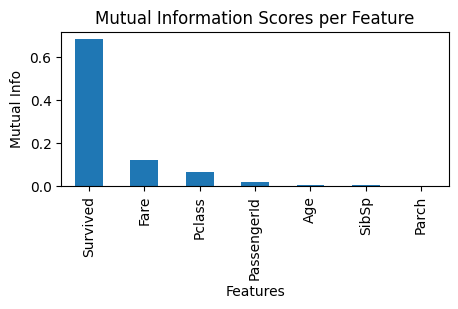

In [ ]:
import matplotlib.pyplot as plt
X_train_filled = df.fillna(0)
non_numeric_cols = X_train_filled.select_dtypes(exclude=np.number).columns
print("Non-numeric columns:", non_numeric_cols)
X_train_filled_numeric = X_train_filled.drop(columns=non_numeric_cols)
mi = mutual_info_regression(X_train_filled_numeric,df["Survived"])
mi_series = pd.Series(mi)
mi_series.index = X_train_filled_numeric.columns
mi_sorted = mi_series.sort_values(ascending=False)
print(mi_sorted)

plt.figure(figsize=(5,2))
mi_sorted.plot.bar()
plt.title("Mutual Information Scores per Feature")
plt.ylabel("Mutual Info")
plt.xlabel("Features")
plt.show()

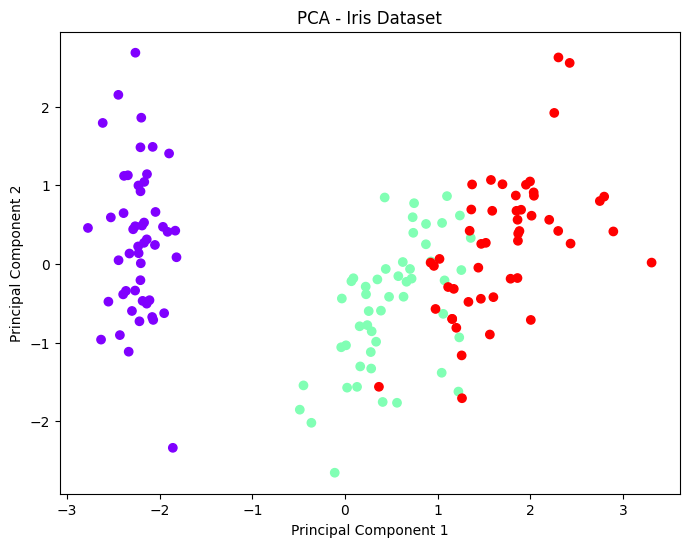

Variable Importance (Loadings):
                         PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

Explained Variance Ratio: [0.72962445 0.22850762]
PC1 explains: 72.96 %
PC2 explains: 22.85 %

Number of PCs explaining >80% variance: 2


In [ ]:
#WEEK-4
# PCA Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load any dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (a) Standardize the variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Why standardize?
# Because PCA is affected by the scale of variables. Standardization ensures that
# each variable contributes equally to the analysis.

# (b) Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a scatter plot (PC1 vs PC2)
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=data.target, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Iris Dataset')
plt.show()

# (c) Most important variables for PC1 and PC2
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1','PC2'],
                        index=data.feature_names)
print("Variable Importance (Loadings):\n", loadings)

# (d) Percentage of variance explained
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
print("PC1 explains:", round(pca.explained_variance_ratio_[0]*100, 2), "%")
print("PC2 explains:", round(pca.explained_variance_ratio_[1]*100, 2), "%")

# (e) PCs explaining >80% of variance
pca_full = PCA().fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print("\nNumber of PCs explaining >80% variance:", n_components_80)


Intercept (b0): 31661.18421052635
Slope (b1): 153.78289473684208
Each additional sq ft increases price by: 153.78289473684208 units

MSE: 97039473.68421033
MAE: 8618.421052631573
RMSE: 9850.861570655145


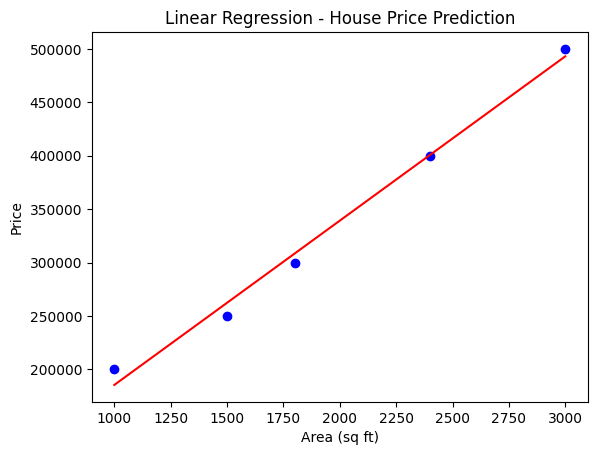

In [ ]:
# Simple Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Example dataset (house prices)
# You can replace this with your own CSV (house_price.csv)
data = {
    'area': [1000,1500,1800,2400,3000],
    'price': [200000,250000,300000,400000,500000]
}
df = pd.DataFrame(data)

X = df[['area']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Intercept and Slope
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])
print("Each additional sq ft increases price by:", model.coef_[0], "units")

# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("\nMSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression - House Price Prediction')
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example dataset
data = {
    'Age':[25,30,35,40,45],
    'Height':[160,165,170,175,180],
    'Weight':[70,80,85,90,95],
    'TimeOnExercise':[30,45,60,20,50],
    'WeightReduction':[2,4,6,1,5]
}
df = pd.DataFrame(data)

X = df[['Age','Height','Weight','TimeOnExercise']]
y = df['WeightReduction']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")


Intercept: -4.389552238805967
Coefficients:
Age: 0.018805970149253746
Height: 0.018805970149253715
Weight: -0.013432835820895508
TimeOnExercise: 0.12835820895522385


In [ ]:
# House price dataset with multiple features
data = {
    'area':[1000,1500,2000,2500,3000],
    'bedrooms':[2,3,3,4,5],
    'age':[5,10,15,20,25],
    'price':[200000,250000,270000,350000,400000]
}
df = pd.DataFrame(data)

X = df[['area','bedrooms','age']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")


Intercept: 70002.19978002214
Coefficients:
area: 43.99560043995604
bedrooms: 40000.00000000001
age: 0.43995600438211113


Intercept: 9.904761904761955
Coefficients: [ 0.         -6.52380952  1.61904762]


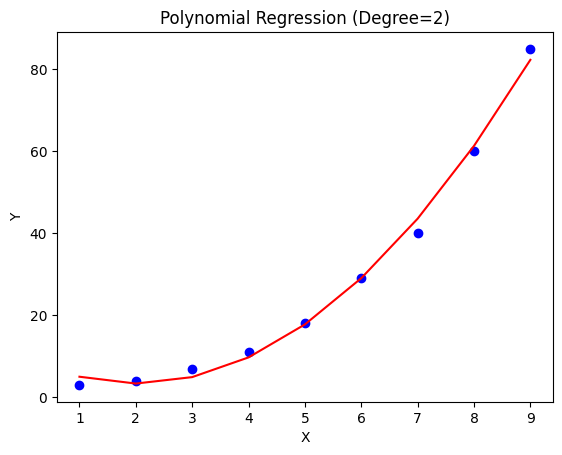

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample non-linear data
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([3,4,7,11,18,29,40,60,85])

# Transform to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree=2)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load diabetes dataset (from sklearn)
from sklearn.datasets import load_diabetes
# NOTE: sklearn diabetes is regression dataset, so let's use Kaggle Pima Indians Diabetes dataset
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                 header=None)
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
              'BMI','DiabetesPedigreeFunction','Age','Outcome']

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-check manually from confusion matrix
TN, FP, FN, TP = cm.ravel()
manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP)
manual_recall = TP / (TP + FN)
manual_f1 = 2 * (manual_precision * manual_recall) / (manual_precision + manual_recall)

print("\nManual Calculation from Confusion Matrix:")
print(f"Accuracy: {manual_accuracy:.3f}")
print(f"Precision: {manual_precision:.3f}")
print(f"Recall: {manual_recall:.3f}")
print(f"F1 Score: {manual_f1:.3f}")


Confusion Matrix:
 [[79 20]
 [18 37]]

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Manual Calculation from Confusion Matrix:
Accuracy: 0.753
Precision: 0.649
Recall: 0.673
F1 Score: 0.661


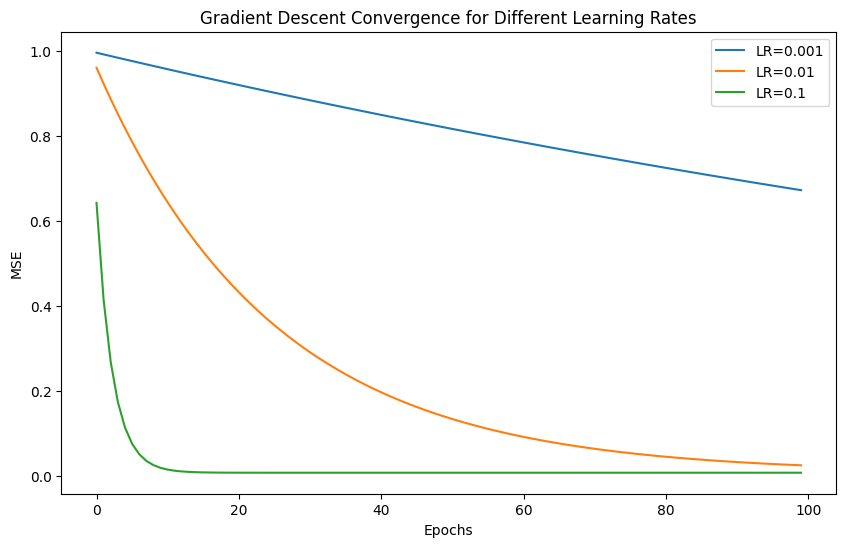

Final parameters -> Slope (m): 0.9935, Intercept (b): -0.0000
Final MSE: 0.008371


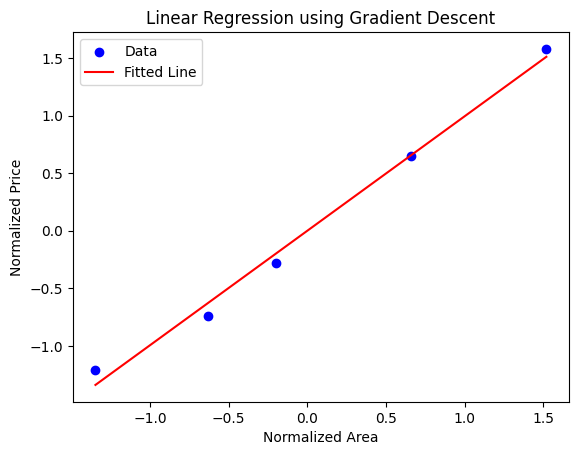

In [ ]:
#WEEK-5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example House Price dataset
data = {
    'area': [1000, 1500, 1800, 2400, 3000],
    'price': [200000, 250000, 300000, 400000, 500000]
}
df = pd.DataFrame(data)

# Feature and target
X = df['area'].values
y = df['price'].values

# Feature scaling for faster convergence
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

# Initialize parameters
m = 0  # slope
b = 0  # intercept

# Function to compute Mean Squared Error
def mse(X, y, m, b):
    y_pred = m * X + b
    return np.mean((y - y_pred) ** 2)

# Gradient Descent function
def gradient_descent(X, y, m, b, lr, epochs):
    n = len(X)
    mse_history = []

    for epoch in range(epochs):
        y_pred = m * X + b
        dm = (-2 / n) * np.sum(X * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)
        m -= lr * dm
        b -= lr * db
        mse_history.append(mse(X, y, m, b))
    return m, b, mse_history

# Try different learning rates
learning_rates = [0.001, 0.01, 0.1]
epochs = 100

plt.figure(figsize=(10,6))
for lr in learning_rates:
    m, b, mse_history = gradient_descent(X, y, 0, 0, lr, epochs)
    plt.plot(range(epochs), mse_history, label=f"LR={lr}")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Gradient Descent Convergence for Different Learning Rates')
plt.legend()
plt.show()

# Final model with best LR
best_lr = 0.01
m, b, mse_history = gradient_descent(X, y, 0, 0, best_lr, 300)
print(f"Final parameters -> Slope (m): {m:.4f}, Intercept (b): {b:.4f}")
print(f"Final MSE: {mse_history[-1]:.6f}")

# Visualize regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, m*X + b, color='red', label='Fitted Line')
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Price')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+01, tolerance: 4.318e-01
  model = cd_fast.enet_coordinate_descent(


MSE (Linear Regression): 2.5965041751843323
MSE (Ridge): 2.5218287634997125
MSE (Lasso): 2.5808514333279953

Coefficients Comparison:
  Feature    Linear     Ridge     Lasso
0       1  0.000000  0.000000  0.000000
1      x0 -0.968533 -0.073796  0.000000
2    x0^2  1.163598  0.604822  0.388828
3    x0^3 -0.290100 -0.153088 -0.074807
4    x0^4  0.023052  0.008613 -0.001437
5    x0^5 -0.000697 -0.000149  0.000282


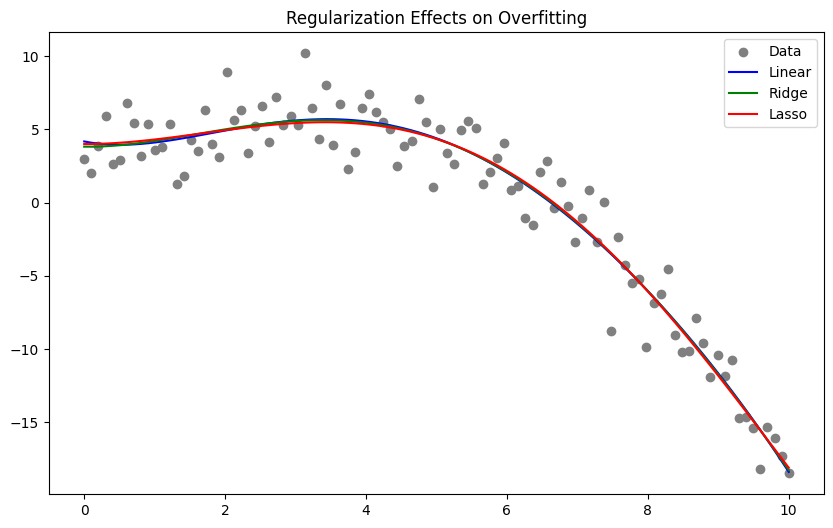

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Non-linear synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + 3*X - 0.5*X**2 + np.random.randn(100, 1)*2  # quadratic + noise

# Create polynomial features
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 1. Normal Linear Regression (for comparison)
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)

# 2. Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 3. Lasso Regression (L1)
lasso = Lasso(alpha=0.05, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate MSE
print("MSE (Linear Regression):", mean_squared_error(y_test, y_pred_lin))
print("MSE (Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("MSE (Lasso):", mean_squared_error(y_test, y_pred_lasso))

# Display coefficients
print("\nCoefficients Comparison:")
coeff_df = pd.DataFrame({
    'Feature': poly.get_feature_names_out(),
    'Linear': lin.coef_.flatten(),
    'Ridge': ridge.coef_.flatten(),
    'Lasso': lasso.coef_.flatten()
})
print(coeff_df)

# Visualize results
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, lin.predict(X_poly), color='blue', label='Linear')
plt.plot(X, ridge.predict(X_poly), color='green', label='Ridge')
plt.plot(X, lasso.predict(X_poly), color='red', label='Lasso')
plt.title('Regularization Effects on Overfitting')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Santander Customer Satisfaction_train (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


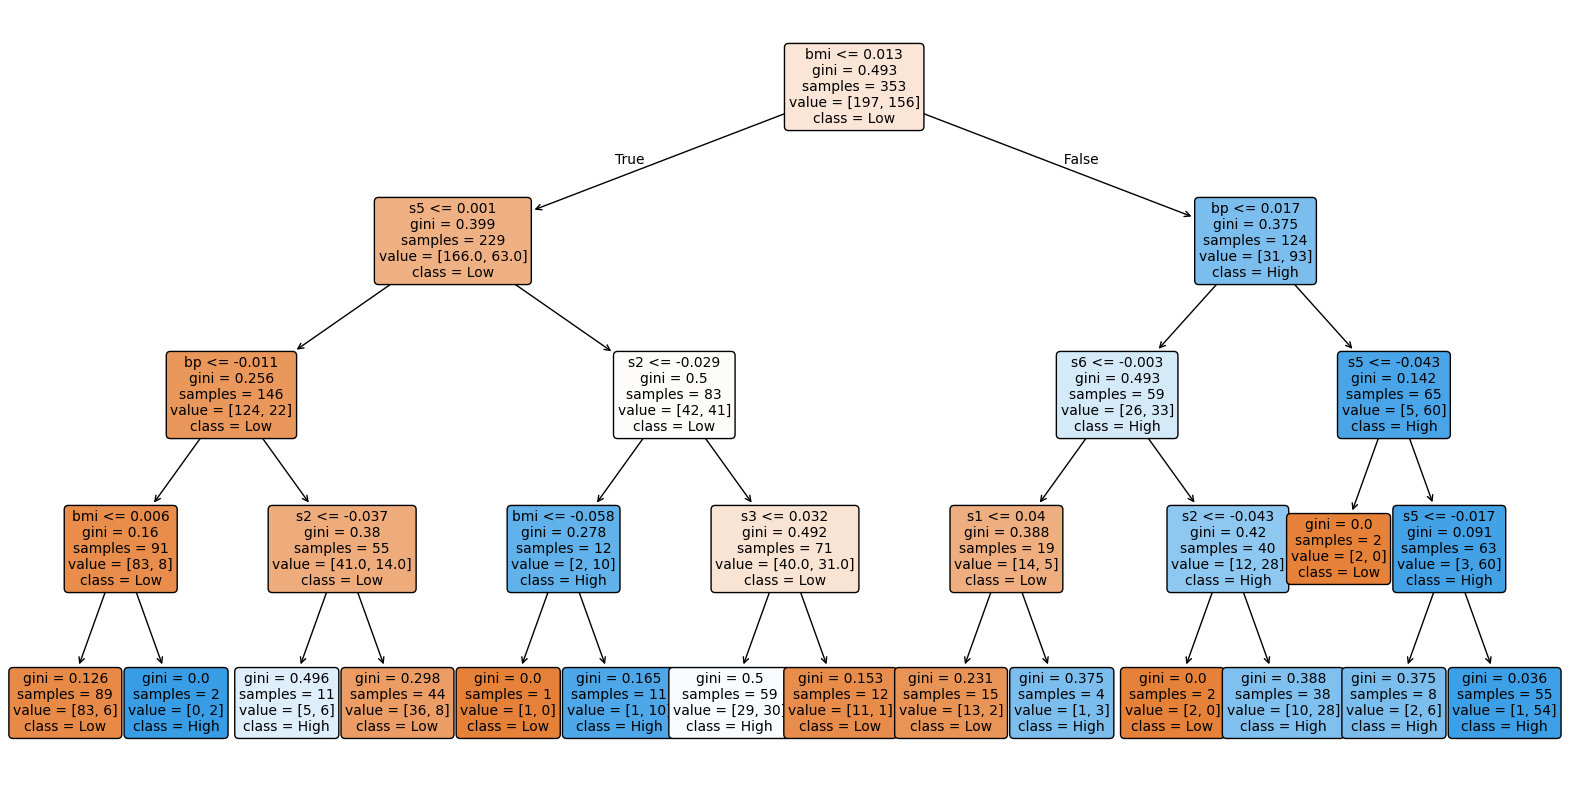

In [ ]:
#WEEK-6
# Implement a Decision Tree on the diabetes dataset and display the tree structure
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd


diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = (diabetes.target > diabetes.target.mean()).astype(int)
# Binary target: 1 if above average, 0 otherwise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=diabetes.feature_names, class_names=["Low", "High"],
          filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
# Naive Bayes on Loan Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example Loan Dataset
data = {
    'Age': [25,35,45,20,35,52,23,40,60,48],
    'Income': ['Low','Medium','High','Low','Medium','High','Low','Medium','High','High'],
    'Loan_Amount': [100,200,300,120,220,330,80,210,400,350],
    'Credit_History': ['Good','Good','Bad','Good','Bad','Good','Bad','Good','Bad','Good'],
    'Loan_Status': ['Approved','Approved','Not Approved','Approved','Not Approved','Approved','Not Approved','Approved','Not Approved','Approved']
}

df = pd.DataFrame(data)

# Encode categorical variables
le = LabelEncoder()
for col in ['Income', 'Credit_History', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df[['Age','Income','Loan_Amount','Credit_History']]
y = df['Loan_Status']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[2 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# SVC on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVC Model
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# KNN on Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Corrected dataset URL (RAW link)
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

# Verify
print("Dataset shape:", df.shape)
print(df.head())

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVC': SVC(kernel='rbf', C=1.0, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Dataset shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Decision Tree Accuracy: 0.736
[[32  9]
 [15 35]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74 

1) K-Means + Elbow method


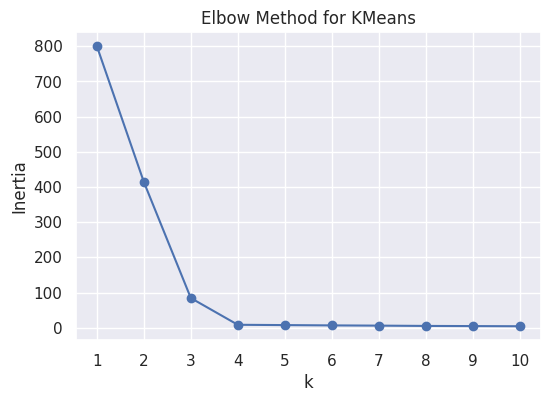

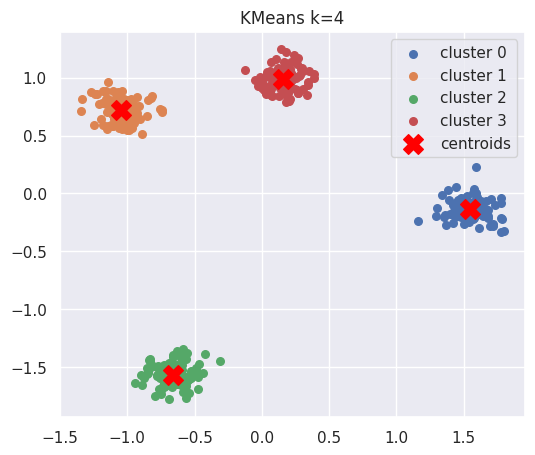

Silhouette score (kmeans): 0.8804644344988128


In [ ]:
#WEEK-7
# Complete clustering toolkit
# Run in Python 3.8+ (Jupyter/Colab). Install packages if missing:
# !pip install scikit-learn scipy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering, Birch
from sklearn.metrics import pairwise_distances, silhouette_score
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import euclidean, cityblock
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
import math

# -----------------------------------------------------------
# 0. Create example data
# -----------------------------------------------------------
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=42)
# Standardize for some algorithms
X_scaled = StandardScaler().fit_transform(X)

# a small dataset for examples (iris)
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)

# Utility plot
def plot_clusters(X, labels, title="Clusters", centroids=None):
    plt.figure(figsize=(6,5))
    unique_labels = np.unique(labels)
    for lab in unique_labels:
        mask = labels == lab
        if lab == -1: color='k'; label='noise'
        else: color=None; label=f'cluster {lab}'
        plt.scatter(X[mask,0], X[mask,1], s=30, label=label)
    if centroids is not None:
        plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X', label='centroids')
    plt.legend()
    plt.title(title)
    plt.show()

# -----------------------------------------------------------
# 1. K-Means clustering + Elbow method
# -----------------------------------------------------------
print("1) K-Means + Elbow method")
inertia = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'o-', markersize=6)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Choose k=4 (we know blobs had 4)
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels_km = kmeans.labels_
centroids = kmeans.cluster_centers_
plot_clusters(X_scaled, labels_km, title=f'KMeans k={k_opt}', centroids=centroids)

print("Silhouette score (kmeans):", silhouette_score(X_scaled, labels_km))



In [ ]:
# -----------------------------------------------------------
# 2. Clustering distance/similarity measures implementations
# -----------------------------------------------------------
print("\n2) Distance / similarity measures (examples)")

# Sample vectors
a = np.array([1, 2, 3])
b = np.array([2, 4, 6])

# I. Euclidean
def euclidean_dist(u, v):
    return np.linalg.norm(u - v)

# II. Manhattan (L1)
def manhattan_dist(u, v):
    return np.sum(np.abs(u - v))

# III. Cosine similarity (and distance)
def cosine_sim(u, v):
    # returns cosine similarity (1 means identical direction)
    denom = (np.linalg.norm(u) * np.linalg.norm(v))
    if denom == 0: return 0.0
    return np.dot(u, v) / denom

def cosine_dist(u, v):
    return 1 - cosine_sim(u, v)

# IV. Minkowski (general p)
def minkowski_dist(u, v, p=3):
    return np.power(np.sum(np.abs(u - v)**p), 1/p)

# V. Jaccard index (for binary sets/vectors)
def jaccard_index(u, v):
    # expects binary or boolean vectors
    u = np.asarray(u) != 0
    v = np.asarray(v) != 0
    intersection = np.logical_and(u, v).sum()
    union = np.logical_or(u, v).sum()
    if union == 0: return 1.0
    return intersection / union

print("Euclidean(a,b):", euclidean_dist(a,b))
print("Manhattan(a,b):", manhattan_dist(a,b))
print("Cosine similarity(a,b):", cosine_sim(a,b))
print("Cosine distance(a,b):", cosine_dist(a,b))
print("Minkowski(a,b,p=3):", minkowski_dist(a,b,3))
print("Jaccard index (binary):", jaccard_index([1,0,1,1],[1,1,0,1]))

# Show pairwise matrix examples on X_scaled using different metrics
print("\nPairwise distances on first 5 rows:")
print("Euclidean:\n", cdist(X_scaled[:5], X_scaled[:5], metric='euclidean'))
print("Manhattan:\n", cdist(X_scaled[:5], X_scaled[:5], metric='cityblock'))
print("Cosine distance:\n", cdist(X_scaled[:5], X_scaled[:5], metric='cosine'))
print("Minkowski p=3:\n", cdist(X_scaled[:5], X_scaled[:5], metric='minkowski', p=3))



2) Distance / similarity measures (examples)
Euclidean(a,b): 3.7416573867739413
Manhattan(a,b): 6
Cosine similarity(a,b): 1.0
Cosine distance(a,b): 0.0
Minkowski(a,b,p=3): 3.3019272488946263
Jaccard index (binary): 0.5

Pairwise distances on first 5 rows:
Euclidean:
 [[0.         1.06897376 0.22765462 3.01234414 2.9282463 ]
 [1.06897376 0.         1.00767973 2.15247761 2.046102  ]
 [0.22765462 1.00767973 0.         2.837775   2.75901579]
 [3.01234414 2.15247761 2.837775   0.         0.13142208]
 [2.9282463  2.046102   2.75901579 0.13142208 0.        ]]
Manhattan:
 [[0.         1.23436928 0.31283213 3.86564375 3.69638153]
 [1.23436928 0.         1.31045677 2.99286527 2.82360306]
 [0.31283213 1.31045677 0.         3.55281161 3.3835494 ]
 [3.86564375 2.99286527 3.55281161 0.         0.16926221]
 [3.69638153 2.82360306 3.3835494  0.16926221 0.        ]]
Cosine distance:
 [[0.00000000e+00 3.10674073e-01 2.25887062e-03 1.85413520e+00
  1.81344936e+00]
 [3.10674073e-01 0.00000000e+00 3.60897


3) Hierarchical Agglomerative clustering (various linkages)


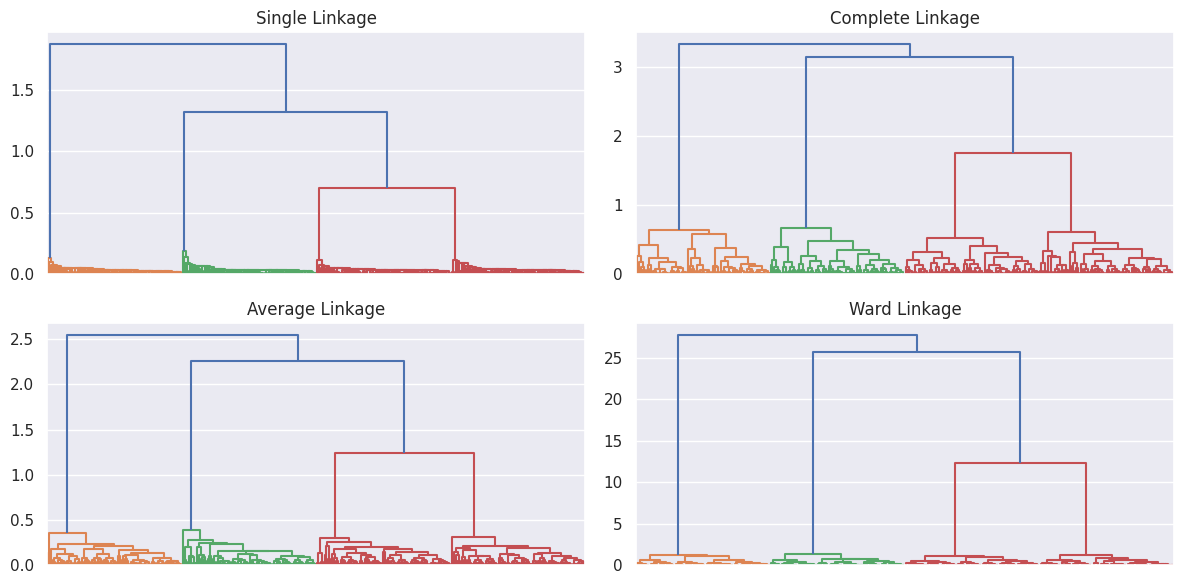

Agglomerative clusters (single linkage) sample: [4 3 4 2 2 3 3 4 3 2]


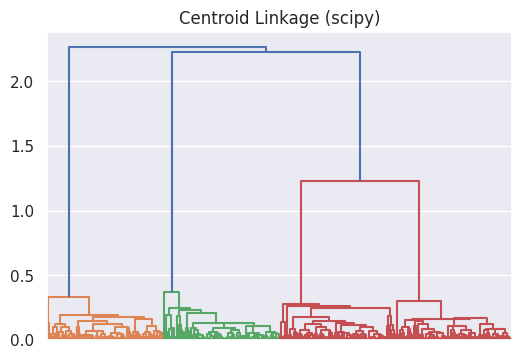

Linkage=single -> silhouette: 0.880
Linkage=complete -> silhouette: 0.880
Linkage=average -> silhouette: 0.880
Linkage=ward -> silhouette: 0.880


In [ ]:

# -----------------------------------------------------------
# 3. Hierarchical clustering - Agglomerative (with many linkages)
# -----------------------------------------------------------
print("\n3) Hierarchical Agglomerative clustering (various linkages)")

# Using scipy linkage for dendrogram (works on condensed distance)
Z_single = linkage(X_scaled, method='single')
Z_complete = linkage(X_scaled, method='complete')
Z_average = linkage(X_scaled, method='average')
Z_ward = linkage(X_scaled, method='ward')  # Ward requires Euclidean

plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
dendrogram(Z_single, no_labels=True, count_sort='ascending')
plt.title('Single Linkage')

plt.subplot(2,2,2)
dendrogram(Z_complete, no_labels=True, count_sort='ascending')
plt.title('Complete Linkage')

plt.subplot(2,2,3)
dendrogram(Z_average, no_labels=True, count_sort='ascending')
plt.title('Average Linkage')

plt.subplot(2,2,4)
dendrogram(Z_ward, no_labels=True, count_sort='ascending')
plt.title('Ward Linkage')

plt.tight_layout()
plt.show()

# Cut dendrogram to get cluster assignments (e.g., 4 clusters)
clusters_single = fcluster(Z_single, t=4, criterion='maxclust')
print("Agglomerative clusters (single linkage) sample:", clusters_single[:10])

# centroid-linkage is available via scipy's 'centroid'
Z_centroid = linkage(X_scaled, method='centroid')
plt.figure(figsize=(6,4))
dendrogram(Z_centroid, no_labels=True)
plt.title('Centroid Linkage (scipy)')
plt.show()

# sklearn AgglomerativeClustering with specific linkages
for link in ['single', 'complete', 'average', 'ward']:
    model = AgglomerativeClustering(n_clusters=4, linkage=link)
    labs = model.fit_predict(X_scaled)
    print(f"Linkage={link} -> silhouette: {silhouette_score(X_scaled, labs):.3f}")




4) Divisive clustering (bisecting k-means) - practical approach


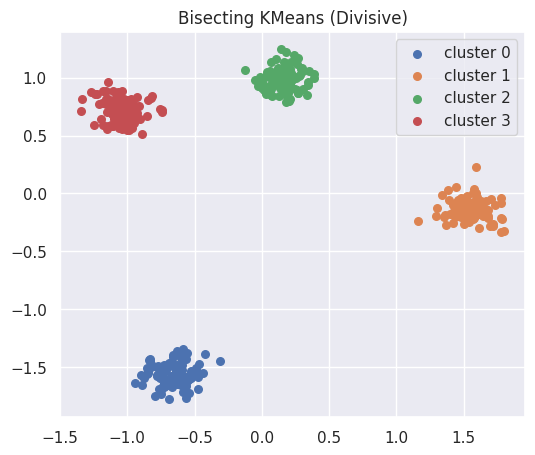

Silhouette (divisive): 0.8804644344988128


In [ ]:
# -----------------------------------------------------------
# 4. Hierarchical DIVISIVE clustering (Bisecting K-Means as practical divisive)
# -----------------------------------------------------------
print("\n4) Divisive clustering (bisecting k-means) - practical approach")

from sklearn.cluster import KMeans

def bisecting_kmeans(X, k, random_state=42):
    # Start with single cluster label 0
    clusters = {0: X}
    labels = np.zeros(X.shape[0], dtype=int)
    next_label = 1
    while len(clusters) < k:
        # Choose cluster to split: largest SSE or largest size
        largest_label = max(clusters.keys(), key=lambda lab: clusters[lab].shape[0])
        to_split_idx = np.where(labels == largest_label)[0]
        if to_split_idx.size <= 1:
            break
        X_sub = X[to_split_idx]
        # bisect using kmeans k=2 (multiple inits to avoid bad split)
        km = KMeans(n_clusters=2, random_state=random_state, n_init=10).fit(X_sub)
        # assign new labels
        labels[to_split_idx[ km.labels_ == 1 ]] = next_label
        # keep cluster 0 as original label (largest_label), and new label is next_label
        # update clusters dict (not strictly necessary beyond termination)
        clusters[largest_label] = X[labels==largest_label]
        clusters[next_label] = X[labels==next_label]
        next_label += 1
    return labels

labels_bisect = bisecting_kmeans(X_scaled, k=4)
plot_clusters(X_scaled, labels_bisect, title="Bisecting KMeans (Divisive)")

print("Silhouette (divisive):", silhouette_score(X_scaled, labels_bisect))



5) BIRCH clustering


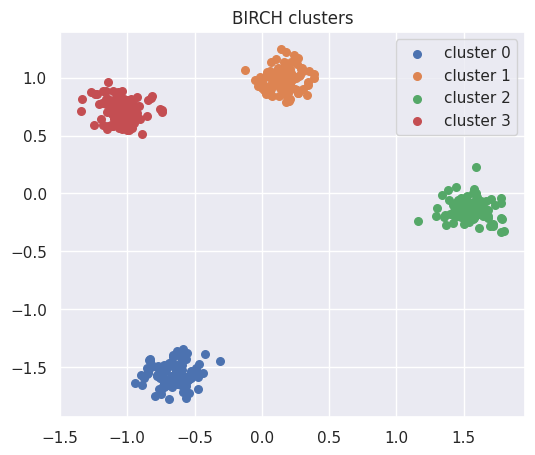

Silhouette (BIRCH): 0.8804644344988128

Note: CHAMELEON algorithm is a research algorithm (graph-based, dynamic modeling).
It is not provided by sklearn or scipy. Implementing CHAMELEON from scratch is large
— for practical purposes use BIRCH, Agglomerative, or graph-based clustering libraries.


In [ ]:

# -----------------------------------------------------------
# 5. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
# -----------------------------------------------------------
print("\n5) BIRCH clustering")
birch_model = Birch(n_clusters=4)
labels_birch = birch_model.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_birch, title="BIRCH clusters")
print("Silhouette (BIRCH):", silhouette_score(X_scaled, labels_birch))

# -----------------------------------------------------------
# Note on CHAMELEON
# -----------------------------------------------------------
print("\nNote: CHAMELEON algorithm is a research algorithm (graph-based, dynamic modeling).")
print("It is not provided by sklearn or scipy. Implementing CHAMELEON from scratch is large")
print("— for practical purposes use BIRCH, Agglomerative, or graph-based clustering libraries.")




6) DBSCAN clustering


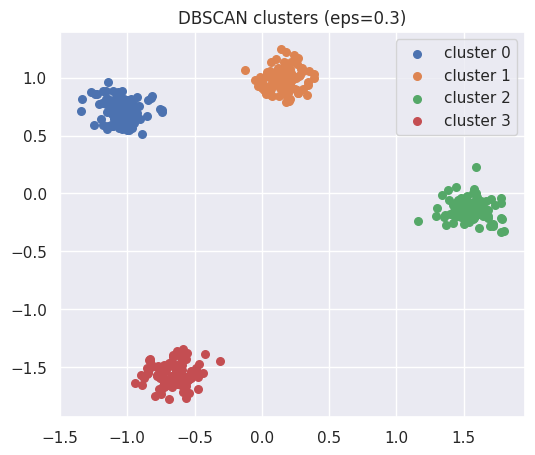

Unique labels (DBSCAN): [0 1 2 3]
Silhouette (DBSCAN): 0.8804644344988128

7) Spectral Clustering


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


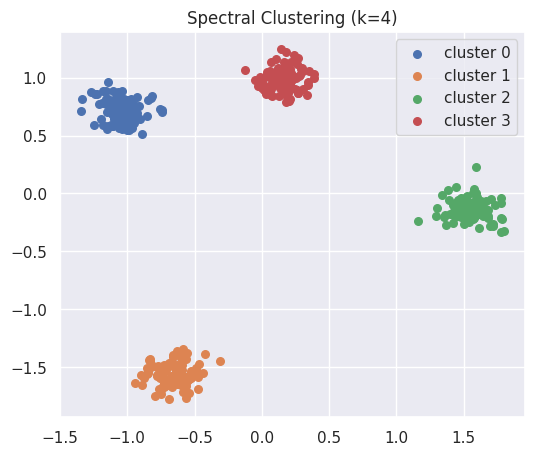

Silhouette (Spectral): 0.8804644344988128

8) Quick comparisons:
                 n_clusters  silhouette
KMeans                    4    0.880464
BisectingKMeans           4    0.880464
BIRCH                     4    0.880464
DBSCAN                    4    0.880464
Spectral                  4    0.880464


In [ ]:
# -----------------------------------------------------------
# 6. DBSCAN clustering
# -----------------------------------------------------------
print("\n6) DBSCAN clustering")
db = DBSCAN(eps=0.3, min_samples=5)  # tune eps/min_samples
labels_db = db.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_db, title="DBSCAN clusters (eps=0.3)")
print("Unique labels (DBSCAN):", np.unique(labels_db))
# If -1 present -> noise points
if len(np.unique(labels_db)) > 1:
    try:
        print("Silhouette (DBSCAN):", silhouette_score(X_scaled[labels_db!=-1], labels_db[labels_db!=-1]))
    except Exception as e:
        print("Silhouette not computed (maybe too few clusters).", e)

# -----------------------------------------------------------
# 7. Spectral Clustering
# -----------------------------------------------------------
print("\n7) Spectral Clustering")
spec = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
labels_spec = spec.fit_predict(X_scaled)
plot_clusters(X_scaled, labels_spec, title='Spectral Clustering (k=4)')
print("Silhouette (Spectral):", silhouette_score(X_scaled, labels_spec))

# -----------------------------------------------------------
# 8. Comparison table (inertia / silhouette where applicable)
# -----------------------------------------------------------
print("\n8) Quick comparisons:")
from collections import OrderedDict
results = OrderedDict()
models = {
    'KMeans': labels_km,
    'BisectingKMeans': labels_bisect,
    'BIRCH': labels_birch,
    'DBSCAN': labels_db,
    'Spectral': labels_spec
}
for name, labs in models.items():
    n_clusters = len([lab for lab in np.unique(labs) if lab != -1])
    try:
        sil = silhouette_score(X_scaled[labs!=-1], labs[labs!=-1]) if (labs!=-1).sum()>1 else np.nan
    except:
        sil = np.nan
    results[name] = (n_clusters, sil)

res_df = pd.DataFrame.from_dict(results, orient='index', columns=['n_clusters','silhouette'])
print(res_df)



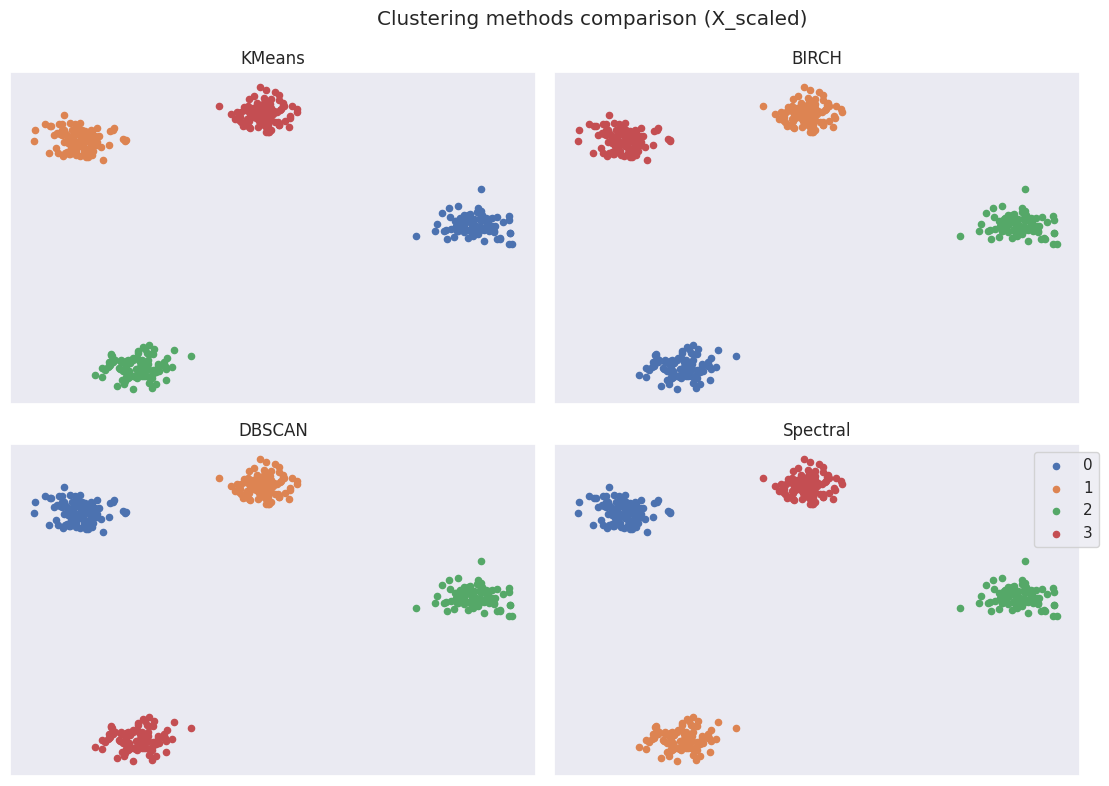


Done. You can tune hyperparameters (k, eps, linkage, affinity) and data preprocessing for best results.


In [ ]:
# -----------------------------------------------------------
# Example: visualize cluster assignments for multiple methods side-by-side
# -----------------------------------------------------------
plt.figure(figsize=(12,8))
methods = [('KMeans', labels_km), ('BIRCH', labels_birch), ('DBSCAN', labels_db), ('Spectral', labels_spec)]
for i,(name, labs) in enumerate(methods,1):
    plt.subplot(2,2,i)
    for lab in np.unique(labs):
        mask = labs == lab
        plt.scatter(X_scaled[mask,0], X_scaled[mask,1], s=20, label=f'{lab}')
    plt.title(name)
    plt.xticks([]); plt.yticks([])
plt.suptitle('Clustering methods comparison (X_scaled)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

print("\nDone. You can tune hyperparameters (k, eps, linkage, affinity) and data preprocessing for best results.")



Decision Tree Performance:
Accuracy:  0.9415
Precision: 0.9712
Recall:    0.9352
F1 Score:  0.9528

Random Forest Performance:
Accuracy:  0.9708
Precision: 0.9640
Recall:    0.9907
F1 Score:  0.9772


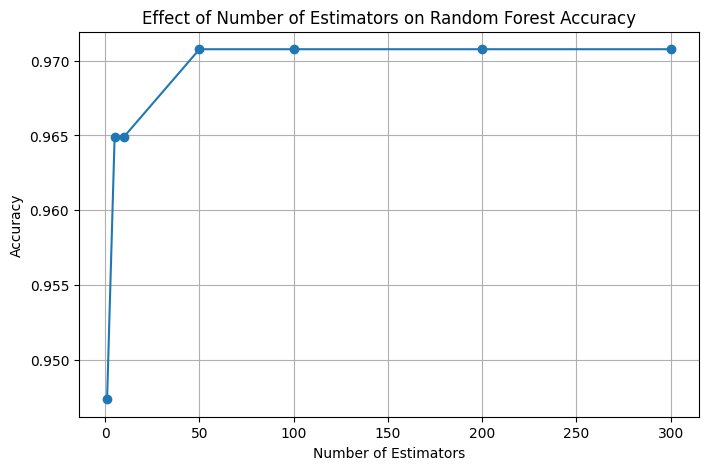

In [ ]:
#WEEK-8
# Ensemble Learning
# Comparision between DecisionTree and RandomForest
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest with default 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    return acc, prec, rec, f1

dt_metrics = evaluate_model("Decision Tree", y_test, y_pred_dt)
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf)


n_estimators = [1, 5, 10, 50, 100, 200, 300]
accuracies = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(n_estimators, accuracies, marker='o')
plt.title("Effect of Number of Estimators on Random Forest Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
# Max Voting, Average Voting, and Weighted Average Voting (assign weights based on each model’s performance).
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)


models = [("Logistic Regression", clf1), ("Decision Tree", clf2), ("KNN", clf3)]

print("\nIndividual Model Performance:")
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

hard_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='hard'
)
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)


soft_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft'
)
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)

acc_lr = accuracy_score(y_test, clf1.predict(X_test))
acc_dt = accuracy_score(y_test, clf2.predict(X_test))
acc_knn = accuracy_score(y_test, clf3.predict(X_test))

weighted_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft',
    weights=[acc_lr, acc_dt, acc_knn]
)
weighted_voting.fit(X_train, y_train)
y_pred_weighted = weighted_voting.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("\n--- Ensemble Results ---")
print(f"Max (Hard) Voting Accuracy:      {acc_hard:.4f}")
print(f"Average (Soft) Voting Accuracy:  {acc_soft:.4f}")
print(f"Weighted Voting Accuracy:        {acc_weighted:.4f}")



Individual Model Performance:

Logistic Regression:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


KNN:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
   

In [ ]:
# Hard Voting and Soft Voting
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

models = [("Logistic Regression", clf1), ("Decision Tree", clf2), ("KNN", clf3)]

print("\nIndividual Model Performance:")
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

hard_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='hard'
)
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)

soft_voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft'
)
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)


print("\n--- Ensemble Voting Comparison ---")
print(f"Hard Voting Accuracy: {acc_hard:.4f}")
print(f"Soft Voting Accuracy: {acc_soft:.4f}")

print("\nClassification Report - Hard Voting:")
print(classification_report(y_test, y_pred_hard, zero_division=0))

print("\nClassification Report - Soft Voting:")
print(classification_report(y_test, y_pred_soft, zero_division=0))



Individual Model Performance:

Logistic Regression:
Accuracy: 0.9815
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Decision Tree:
Accuracy: 0.9630
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


KNN:
Accuracy: 0.9630
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
   